## Observations and Insights 

In [115]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [35]:
# Checking the number of mice.
mice = combined['Mouse ID'].value_counts()
number_mice = len(mice)
print(f"There are {number_mice} mice in the study.")

There are 249 mice in the study.


In [36]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined['Mouse ID'].value_counts()


g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [37]:
# Optional: Get all the data for the duplicate mouse ID. The duplicate mouse ID is g989.
duplicate_mouse_id=combined.loc[(combined['Mouse ID'] == 'g989')]
duplicate_mouse_id


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined.loc[(combined['Mouse ID'] != 'g989')]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [39]:
# Checking the number of mice in the clean DataFrame.
clean_data['Mouse ID'].value_counts()

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#mean
reg_mean = clean_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']

#median
reg_median = clean_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']

#variance
reg_var = clean_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']

#standard deviation
reg_std = clean_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']

#SEM
reg_sem = clean_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

#Summary Dataframe
tumor_vol_stats = pd.DataFrame({'Mean': reg_mean, 'Median': reg_median, 'Variance': reg_var, 'Standard Deviation': reg_std, 'SEM': reg_sem})
tumor_vol_stats




,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line



## Bar and Pie Charts

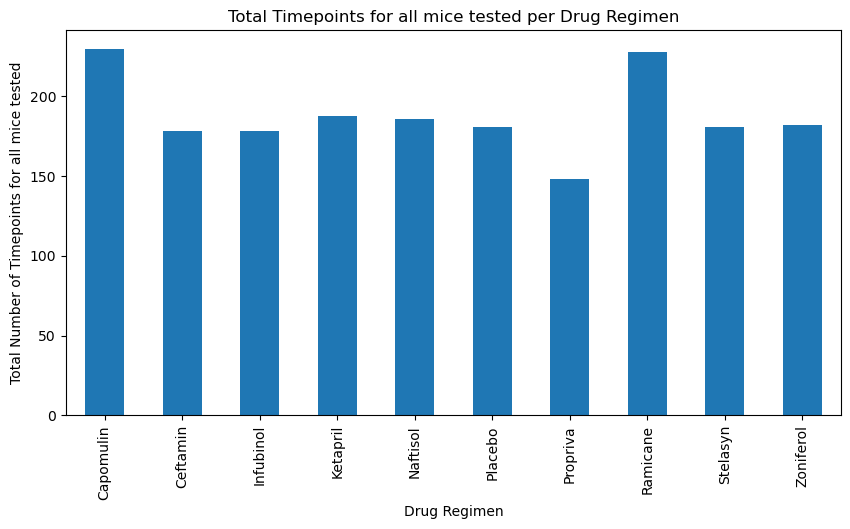

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

In [41]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count_timepoint = clean_data.groupby(['Drug Regimen']).count()["Timepoint"]
count_timepoint.plot(kind='bar', figsize=(10,5))

plt.title('Total Timepoints for all mice tested per Drug Regimen')
plt.ylabel('Total Number of Timepoints for all mice tested')
plt.show()

count_timepoint



Text(0, 0.5, 'Total Number of Timepoints for all mice tested')

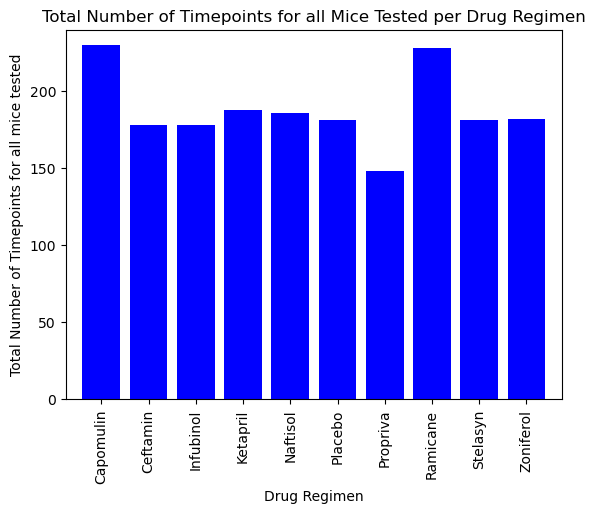

In [54]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimen = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
timepoints_mice = [230,178,178,188,186,181,148,228,181,182]
x_axis = np.arange(len(timepoints_mice))
plt.bar(x_axis, timepoints_mice, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen)
plt.xticks(rotation=90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(timepoints_mice)+10)

#Labels
plt.title("Total Number of Timepoints for all Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints for all mice tested")





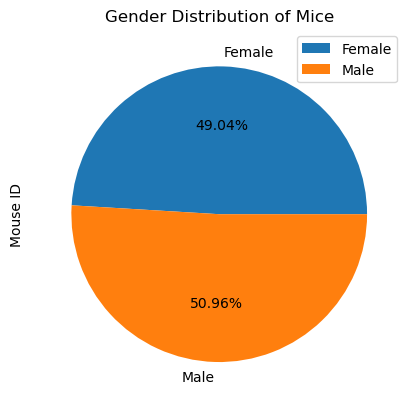

In [134]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = clean_data.groupby(['Sex']).count()

pie_plot = mouse_gender.plot(kind='pie',y='Mouse ID', title=('Gender Distribution of Mice'), autopct="%1.2f%%")



([<matplotlib.patches.Wedge at 0x7fe21a287a60>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

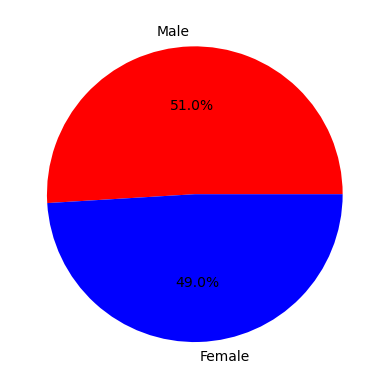

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male','Female']
size = [958,922]
colors = ['red','blue']
plt.pie(size, labels=labels, colors=colors,
        autopct="%1.1f%%")



## Quartiles, Outliers and Boxplots

In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(clean_data.groupby('Mouse ID')['Timepoint'].max())
max_timepoint_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_df = pd.merge(max_timepoint_df,clean_data, on=(['Mouse ID','Timepoint']))
final_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [97]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    t_regimen = final_df.loc[final_df['Drug Regimen'] == treatment]
    tumor_volume = t_regimen['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_volume) 
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartile0 = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0 

quartile1 = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

quartile2 = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2

quartile3 = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3
    
# Determine outliers using upper and lower bounds
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)

print(f"for Capomulin, the IQR is {IQR0}. Values below {lower_bound0} and above {upper_bound0} could be outliers.")
print(f"for Ramicane, the IQR is {IQR1}. Values below {lower_bound1} and above {upper_bound1} could be outliers.")
print(f"for Infubinol, the IQR is {IQR2}. Values below {lower_bound2} and above {upper_bound2} could be outliers.")
print(f"for Ceftamin, the IQR is {IQR3}. Values below {lower_bound3} and above {upper_bound3} could be outliers.")


for Capomulin, the IQR is 7.781863460000004. Values below 20.70456164999999 and above 51.83201549 could be outliers.
for Ramicane, the IQR is 9.098536719999998. Values below 17.912664470000003 and above 54.30681135 could be outliers.
for Infubinol, the IQR is 11.477135160000003. Values below 36.83290494999999 and above 82.74144559000001 could be outliers.
for Ceftamin, the IQR is 15.577752179999997. Values below 25.355449580000002 and above 87.66645829999999 could be outliers.


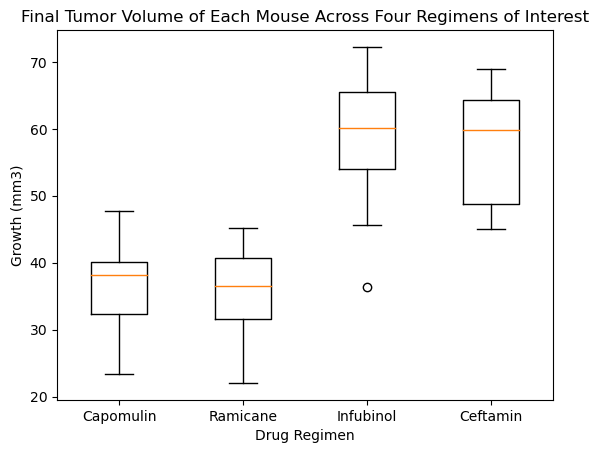

In [99]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Each Mouse Across Four Regimens of Interest')
ax1.set_ylabel('Growth (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vol_data, labels = treatments)
plt.show()

## Line and Scatter Plots

In [100]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin. Choosing ID s185.
capomulin_mice = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
capomulin_mice.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

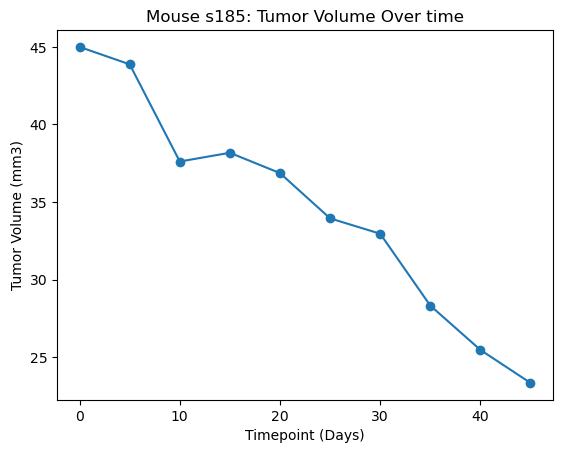

In [107]:
mouse_s185 = clean_data.loc[clean_data["Mouse ID"] == "s185"]

y_tumor = mouse_s185['Tumor Volume (mm3)']
x_time = mouse_s185['Timepoint']

plt.plot(x_time,y_tumor, label = "Tumor Volume (mm3)", marker = 'o')
plt.title("Mouse s185: Tumor Volume Over time")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

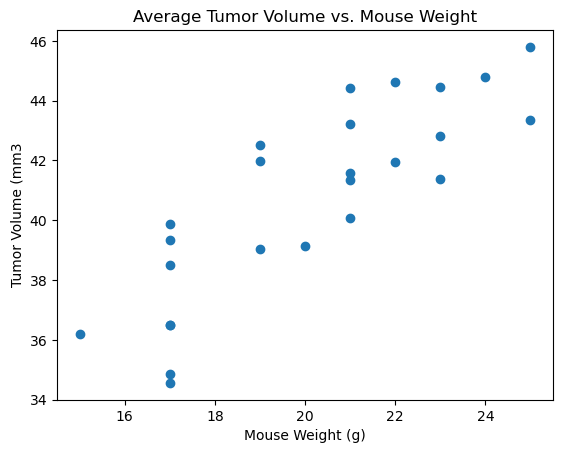

In [112]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_group = capomulin_mice.groupby(['Mouse ID']).mean()
average_tumor_vol = capomulin_group['Weight (g)']
average_weight = capomulin_group['Tumor Volume (mm3)']

plt.scatter(average_tumor_vol,average_weight, marker='o')
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3")
plt.show


## Correlation and Regression

The correlation between weight and average tumor volume for the Capomulin Regimen is 0.84.


Text(21, 38, 'y = 0.95x + 21.55')

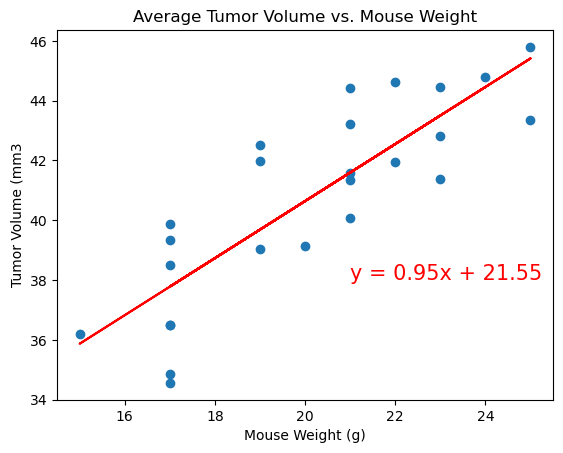

In [131]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#correlation coefficient
correlation = st.pearsonr(average_weight,average_tumor_vol)
print(f'The correlation between weight and average tumor volume for the Capomulin Regimen is {round(correlation[0],2)}.')

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(average_tumor_vol, average_weight)
regress_values =average_tumor_vol * slope + intercept

plt.scatter(average_tumor_vol,average_weight, marker='o')
plt.plot(average_tumor_vol,regress_values,"r-")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3")
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line,(21,38),fontsize=15, color="red")
